In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [388]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [389]:
df_dropped_cols = df.copy()

In [390]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [391]:
# We are converting all the Nulls with the the '0', or 'NO', or 'NONE' of their respective columns because they are 
# overwhelmingly the most common value, so we think it's a safe assumption.

df['waterfront'] = df['waterfront'].fillna('NO')
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace=True)

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Let's convert all the object types to int or float so we can put them in a linear regression.

In [392]:
# Take apart the date column, put it in to three columns as day month and year and have the values numeric.
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
df.drop('date', axis=1, inplace=True)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [394]:
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [395]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [396]:
df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [397]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [398]:
# We simply convert the yes or no values to 1 and 0 respectively.
waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT

0    21451
1      146
Name: waterfront, dtype: int64

In [399]:
# Here we turn each unique value into a column and the column will have a 1 or 0 in it
# to say if that column is true for that house.
view = OneHotEncoder(sparse=False, handle_unknown='ignore')
x2 = df[['view']]
view.fit(x2)
view.transform(x2)
view_array = view.transform(x2)
view_panda = pd.DataFrame(view_array, columns=('View_Average', 'View_Excellent', 'View_Fair', 'View_Good', 'View_None'), index=df.index)
df = pd.concat([df, view_panda], axis=1)


In [400]:
view.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], dtype=object)]

In [401]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [402]:
# Do the same as we did for view.
condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
X3 = df[['condition']]
condition.fit(X3)
condition.transform(X3)
condition_array = condition.transform(X3)
condition_panda = pd.DataFrame(condition_array, columns=('Cond_Average', 'Cond_Fair', 'Cond_Good', 'Cond_Poor',
                                                         'Cond_VeryGood'), index=df.index)
df = pd.concat([df, condition_panda], axis=1)

In [403]:
# And again the same for grade.
grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
x4 = df[['grade']]
grade.fit(x4)
grade_array = grade.transform(x4)
grade_panda = pd.DataFrame(grade_array, columns= ('VeryGoodGrade', 'ExcellentGrade', 'LuxurGrade', 'MansionGrade',
                                                  'PoorGrade', 'LowGrade', 'FairGrade','LowAvgGrade','AvgGrade',
                                                  'GoodGrade', 'BetterGrade',),index=df.index)
df = pd.concat([df, grade_panda], axis=1)

In [404]:
grade.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion',
        '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average',
        '8 Good', '9 Better'], dtype=object)]

In [405]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [406]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [407]:
# We can drop the original columns that we just converted.
df.drop(columns=('condition'), inplace=True)
df.drop(columns=('view'), inplace=True)
df.drop(columns=('grade'), inplace=True)
df.drop(['Cond_Average', 'View_None', 'AvgGrade'], axis=1, inplace=True)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  float64
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  day_sold        21597 non-null 

We now have zero missing values and everything is int or float.
We can start working on our base model.

In [409]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,VeryGoodGrade,ExcellentGrade,LuxurGrade,MansionGrade,PoorGrade,LowGrade,FairGrade,LowAvgGrade,GoodGrade,BetterGrade
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.010799,-0.004359,...,-0.014390,-0.019837,-0.015084,-0.003880,-0.005110,-0.002903,-0.025640,-0.015476,0.042285,0.009121
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.605368,0.321108,...,0.340944,0.357589,0.291068,0.211806,-0.005155,-0.031618,-0.084549,-0.209463,0.004576,0.235859
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.479386,0.297229,...,0.135766,0.116596,0.062257,0.039026,-0.017434,-0.068012,-0.113175,-0.239492,0.073140,0.160294
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.686668,0.278485,...,0.272635,0.247293,0.159734,0.095118,-0.012087,-0.055599,-0.138740,-0.366185,0.189426,0.264756
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.876448,0.428660,...,0.369228,0.345964,0.238136,0.144424,-0.011565,-0.053935,-0.127198,-0.312486,0.071115,0.318499
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.184139,0.015031,...,0.074421,0.077104,0.061699,0.007767,-0.000348,0.000440,0.022931,-0.019116,-0.023923,0.049646
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.523989,-0.241866,...,0.173943,0.118735,0.054276,0.021257,-0.006230,-0.029964,-0.080346,-0.230529,0.201188,0.244184
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.071778,0.083050,...,0.051514,0.068410,0.082899,-0.002025,-0.000561,-0.002919,0.012691,-0.007301,-0.011317,0.007487
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,1.000000,-0.051175,...,0.376399,0.342198,0.222177,0.126666,-0.010429,-0.047669,-0.108543,-0.280761,0.059423,0.343388
sqft_basement,-0.004359,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,-0.051175,1.000000,...,0.060511,0.076299,0.079831,0.063423,-0.004421,-0.022388,-0.059784,-0.120907,0.035518,0.017906


In [410]:
#plt.figure(figsize=(16, 10))
#sns.heatmap(data=df.corr(), annot=True)

In [411]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [412]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)
baseline.score(X_train, y_train)

0.0

In [413]:
baseline.score(X_test, y_test)

-0.0002252015545449737

In [414]:
lr = LinearRegression()
lr.fit(X_train, np.log(y_train))
lr.score(X_train,np.log(y_train))

0.7737003183941793

In [415]:
lr.score(X_test,np.log(y_test))

0.7796304672766872

In [416]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [417]:
log_price = np.log(df['price'])
df['log_price'] = log_price

In [418]:
 
outcome = 'log_price'
predictors = df.drop(['price', 'log_price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2012.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:46:31   Log-Likelihood:                -664.61
No. Observations:               21597   AIC:                             1405.
Df Residuals:                   21559   BIC:                             1708.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -127.2573     12.416    -10.250      0.000    -151.593    -102.922
id               4.11e-13      6e-13      0.685      0.493   -7.65e-13    1.59e-12
bedrooms          -0.0178      0.002     -7.376      0.000      -0.023      -0.013
bathrooms          0.0695      0.004     17.058      0.000       0.062       0.078
sqft_living        0.0001   2.24e-05      6.063      0.000    9.21e-05       0.000
sqft_lot        4.832e-07   5.96e-08      8.102      0.000    3.66e-07       6e-07
floors             0.0690      0.005     15.174      0.000       0.060       0.078
waterfront         0.3923      0.025     15.475      0.000       0.343       0.442
sqft_above      1.541e-05   2.25e-05      0.686      0.493   -2.86e-05    5.94e-05
sqft_basement    1.93e-05   2.22e-05      0.868      0.385   -2.43e-05    6.29e-05
yr_built          -0.0037   9.14e-05    -40.114      0.000      -0.004      -0.003
yr_renovated    3.491e-05   4.96e-06      7.034      0.000    2.52e-05    4.46e-05
zipcode           -0.0007   4.12e-05    -15.980      0.000      -0.001      -0.001
lat                1.3942      0.013    104.280      0.000       1.368       1.420
long              -0.1604      0.016     -9.779      0.000      -0.193      -0.128
sqft_living15   9.399e-05   4.33e-06     21.716      0.000    8.55e-05       0.000
sqft_lot15     -2.562e-07   9.13e-08     -2.807      0.005   -4.35e-07   -7.73e-08
day_sold          -0.0005      0.000     -2.572      0.010      -0.001      -0.000
month_sold         0.0020      0.001      2.284      0.022       0.000       0.004
year_sold          0.0622      0.006     10.590      0.000       0.051       0.074
View_Average       0.1219      0.009     14.232      0.000       0.105       0.139
View_Excellent     0.2554      0.018     14.425      0.000       0.221       0.290
View_Fair          0.1711      0.014     12.148      0.000       0.143       0.199
View_Good          0.1755      0.012     14.958      0.000       0.152       0.198
Cond_Fair         -0.1255      0.020     -6.433      0.000      -0.164      -0.087
Cond_Good          0.0544      0.004     12.555      0.000       0.046       0.063
Cond_Poor         -0.2070      0.047     -4.418      0.000      -0.299      -0.115
Cond_VeryGood      0.1239      0.007     17.892      0.000       0.110       0.137
VeryGoodGrade      0.4589      0.011     43.285      0.000       0.438       0.480
ExcellentGrade     0.5317      0.016     32.638      0.000       0.500       0.564
LuxurGrade         0.6057      0.030     20.230      0.000       0.547       0.664
MansionGrade       0.6823      0.072      9.452      0.000       0.541       0.824
PoorGrade          0.1115      0.250      0.446      0.656      -0.379       0.602
LowGrade          -0.4505      0.048     -9.290      0.000      -0.546      -0.355
FairGrade   

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  float64
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  day_sold        21597 non-null 

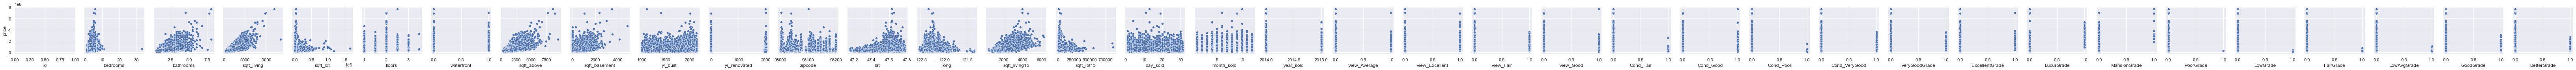

In [341]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(df, x_vars=list(X[:5].columns), y_vars='price')

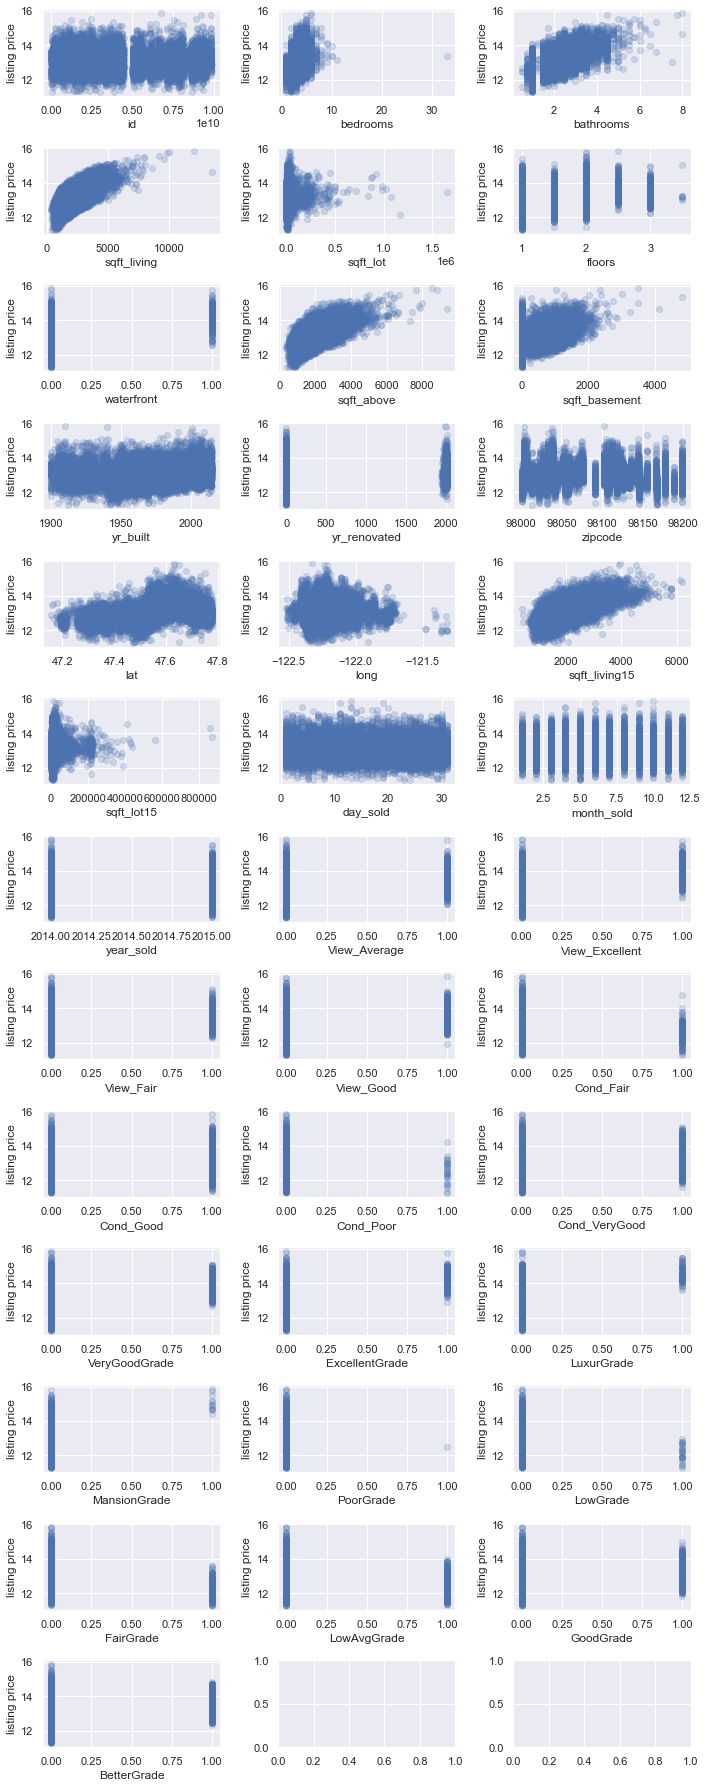

In [342]:
fig, axes = plt.subplots(ncols=3, nrows=13, figsize=(10, 25))
fig.set_tight_layout(True)

for index, col in enumerate(X.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X[col], np.log(y), alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

In [343]:
y_pred = model.predict(X_test)

In [344]:
error=y_pred-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

39885080438.96562
199712.49444880913


In [345]:
from sklearn import metrics
actual = y_test
predicted = y_pred

mse = metrics.mean_squared_error(actual, predicted)

rmse = np.sqrt(mse)

print(rmse)

199712.49444880913


In [346]:
drop_cols = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [347]:
df_dropped_cols

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [365]:
df_dropped_cols.drop(drop_cols, axis=1,inplace=True)

In [366]:
df_dropped_cols

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [367]:
df_dropped_cols.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [368]:
df_dropped_cols['waterfront'] = df_dropped_cols['waterfront'].fillna('NO')

In [369]:
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [370]:
grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
x4 = df_dropped_cols[['grade']]
grade.fit(x4)
grade_array = grade.transform(x4)
grade_panda = pd.DataFrame(grade_array, columns= ('VeryGoodGrade', 'ExcellentGrade', 'LuxurGrade', 'MansionGrade',
                                                  'PoorGrade','LowGrade', 'FairGrade','LowAvgGrade','AvgGrade',
                                                  'GoodGrade','BetterGrade'),index=df_dropped_cols.index)
df_dropped_cols = pd.concat([df_dropped_cols, grade_panda], axis=1)

In [371]:
condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
X3 = df_dropped_cols[['condition']]
condition.fit(X3)
condition.transform(X3)
condition_array = condition.transform(X3)
condition_panda = pd.DataFrame(condition_array, columns=('Cond_Average', 'Cond_Fair', 'Cond_Good', 'Cond_Poor',
                                                         'Cond_VeryGood'), index=df_dropped_cols.index)
df_dropped_cols = pd.concat([df_dropped_cols, condition_panda], axis=1)


In [372]:
waterfront = preprocessing.LabelEncoder()
x1 = list(df_dropped_cols['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df_dropped_cols['waterfront'] = waterfront_list
df_dropped_cols['waterfront'].value_counts()


0    21451
1      146
Name: waterfront, dtype: int64

In [373]:
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   condition       21597 non-null  object 
 9   grade           21597 non-null  object 
 10  yr_built        21597 non-null  int64  
 11  VeryGoodGrade   21597 non-null  float64
 12  ExcellentGrade  21597 non-null  float64
 13  LuxurGrade      21597 non-null  float64
 14  MansionGrade    21597 non-null  float64
 15  PoorGrade       21597 non-null  float64
 16  LowGrade        21597 non-null  float64
 17  FairGrade       21597 non-null 

In [374]:
df_dropped_cols.drop(['Cond_Average', 'AvgGrade'], axis=1, inplace=True)
df_dropped_cols.drop(['condition', 'grade'], axis=1, inplace=True)
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   yr_built        21597 non-null  int64  
 9   VeryGoodGrade   21597 non-null  float64
 10  ExcellentGrade  21597 non-null  float64
 11  LuxurGrade      21597 non-null  float64
 12  MansionGrade    21597 non-null  float64
 13  PoorGrade       21597 non-null  float64
 14  LowGrade        21597 non-null  float64
 15  FairGrade       21597 non-null  float64
 16  LowAvgGrade     21597 non-null  float64
 17  GoodGrade       21597 non-null 

In [381]:
X = df_dropped_cols.iloc[:, :9].drop('price', axis=1)
y = df_dropped_cols['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)


baseline = DummyRegressor()
baseline.fit(X_train, y_train)
print('Baseline score for training:', baseline.score(X_train, y_train))
print('Baseline score for test:', baseline.score(X_test, y_test))

Baseline score for training: 0.0
Baseline score for test: -0.0002252015545449737


In [382]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Regression score for training:', lr.score(X_train, y_train))
print('Regression score for test:', lr.score(X_test, y_test))


actual = y_test
predicted = y_pred
mse = metrics.mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print('Our root mean squared error is:' , rmse)

Regression score for training: 0.5857780821621975
Regression score for test: 0.5826094670558188
Our root mean squared error is: 199712.49444880913


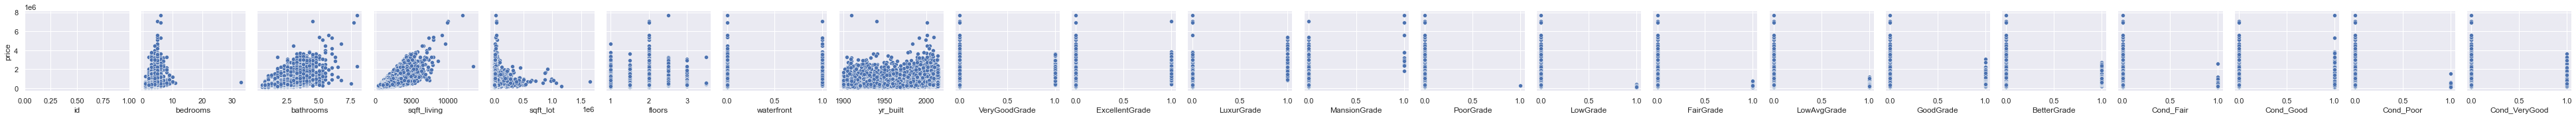

In [378]:
sns.pairplot(df_dropped_cols, x_vars=list(X.columns), y_vars='price')

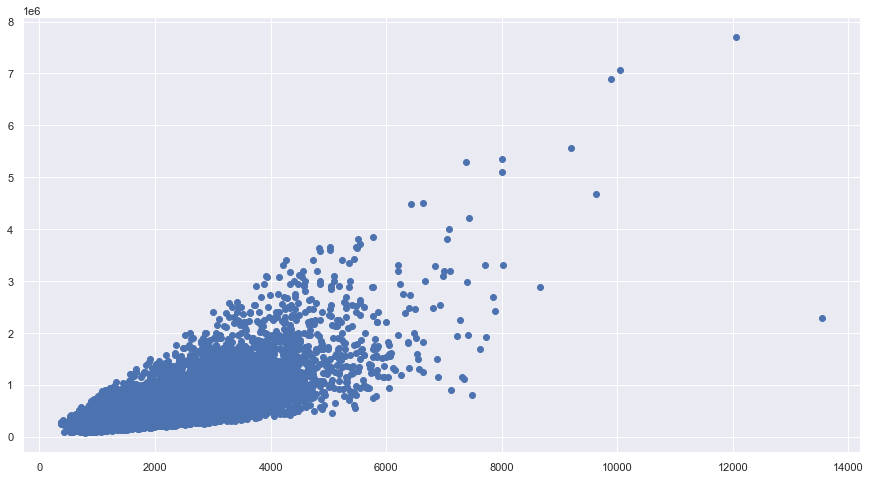

In [380]:
X1 = X['sqft_living']
plt.scatter(X1,y)

In [421]:
X1

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

In [422]:
formula = 'price~sqft_living'
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:55:42   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [426]:
lr = LinearRegression()
lr.fit(X_train[['sqft_living']], y_train)
print('Regression score for training:', lr.score(X_train[['sqft_living']], y_train))
print('Regression score for test:', lr.score(X_test[['sqft_living']], y_test))

y_pred = model.predict(X_test[['sqft_living']])
actual = y_test
predicted = y_pred
mse = metrics.mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print('Our root mean squared error is:' , rmse)

Regression score for training: 0.4945445156766466
Regression score for test: 0.48733518973535617
Our root mean squared error is: 279226.71148541407


In [360]:
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   condition       21597 non-null  object 
 9   grade           21597 non-null  object 
 10  yr_built        21597 non-null  int64  
 11  VeryGoodGrade   21597 non-null  float64
 12  ExcellentGrade  21597 non-null  float64
 13  LuxurGrade      21597 non-null  float64
 14  MansionGrade    21597 non-null  float64
 15  PoorGrade       21597 non-null  float64
 16  LowGrade        21597 non-null  float64
 17  FairGrade       21597 non-null 